Para esse exercício iremos mostrar que até mesmo um modelo de aprendizado de máquina, não é capaz de dizer em 100% dos casos quando uma lista está ordenada. É importante ressaltar que para treinar o modelo em questão, só foram considerados os primeiros 20 elementos da lista, o que em um problema real não é suficiente para afirmar, com uma precisão confiável, que a lista esteja ordenada.
Sendo assim, em casos especificos é necessário utilizar o selection sort para ter certeza, em quase 100% dos casos que a lista está ordenada.

In [36]:
import random, time
import pandas as pd
NUMBER_OF_ELEMENTS = 100
RANGE_OF_ELEMENTS = 100000

def generate_random_numbers():
     return random.sample(range(RANGE_OF_ELEMENTS), NUMBER_OF_ELEMENTS)

list_number = generate_random_numbers()


## Selection Sort

In [37]:

def selection_sort(list_number):
    size_list = len(list_number)
    for i in range(0,size_list):
        current = list_number[i]
        min_value =  min(list_number[i:])
        min_value_index = list_number.index(min(list_number[i:]))
        if current != min_value :
            list_number[i], list_number[min_value_index] = list_number[min_value_index] , list_number[i]
    return list_number

## Get time for execute the Sort algorithm with an array random

In [38]:
interation_with_random_numbers = []
time_for_execution = []
number_of_elements = 100
for a in range(3):
    #random_numbers = generate_random_numbers()
    random_numbers = random.sample(range(100000), number_of_elements)
    start = time.time()
    ordination = selection_sort(random_numbers)
    end = time.time()
    time_of_execution = end - start
    interation_with_random_numbers.append(number_of_elements)
    time_for_execution.append(time_of_execution)
    number_of_elements = number_of_elements*10

## Graphic of Sort Algorithm: time vs amount of elements in an array with random numbers

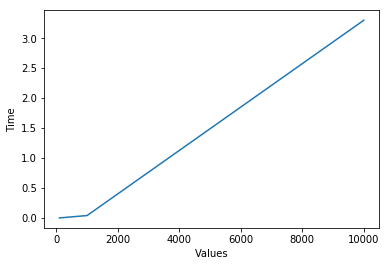

[0.0013816356658935547, 0.04100632667541504, 3.298933744430542]
[100, 1000, 10000]


In [39]:
import matplotlib.pyplot as plt
plt.xlabel("Values")
plt.ylabel("Time")
plt.plot(interation_with_random_numbers,time_for_execution)
plt.show()
print(time_for_execution)
print(interation_with_random_numbers)

## Get time for execute the Sort algorithm with an array sorted

In [50]:
interation_with_sorted_numbers = []
time_for_execution_sorted = []
number_of_elements_sorted = 100
for a in range(3):
    #random_numbers = generate_random_numbers()
    random_numbers = random.sample(range(100000), number_of_elements_sorted)
    random_numbers.sort()
    start = time.time()
    ordination = selection_sort(random_numbers)
    end = time.time()
    time_of_execution = end - start
    interation_with_sorted_numbers.append(number_of_elements_sorted)
    time_for_execution_sorted.append(time_of_execution)
    number_of_elements_sorted = number_of_elements_sorted*10

## Graphic of Sort Algorithm: time vs amount of elements in a sorted array

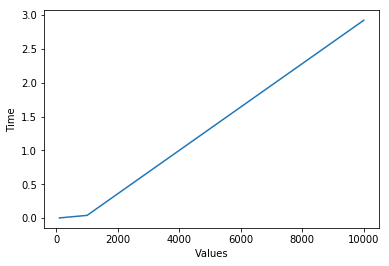

[0.0016326904296875, 0.03928089141845703, 2.9224324226379395]
[100, 1000, 10000]


In [51]:
import matplotlib.pyplot as plt
plt.xlabel("Values")
plt.ylabel("Time")
plt.plot(interation_with_sorted_numbers,time_for_execution_sorted)
plt.show()
print(time_for_execution_sorted)
print(interation_with_sorted_numbers)

In [52]:
list_for_frame = [[]]
result = []
for i in range(0,900000):
    lis_number = generate_random_numbers()
    flag = random.randint(1,RANGE_OF_ELEMENTS)
    if flag % 3 == 0:
        lis_number.sort()
        result.append('True')
    else :
        result.append('False')
        
    list_for_frame.append(lis_number[0:20])
df = pd.DataFrame(list_for_frame,columns=['Elem :1','Elem :2','Elem :3','Elem :4','Elem :5','Elem :6','Elem :7',
                        'Elem :8','Elem :9','Elem :10','Elem :11','Elem :12','Elem :13','Elem :14',
                      'Elem :15','Elem :16','Elem :17','Elem :18','Elem :19','Elem :20'])

df = df.drop(df.index[0])

In [53]:
list_pandas_series = pd.Series(result)
df['Result'] = list_pandas_series.values

In [54]:
def make_target_frame(frame, target_column):
    df_mod = frame.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].map({'True':1, 'False':0})
    return (df_mod, targets)
frame, targets = make_target_frame(df, "Result")

In [55]:
frame.head()

,Elem :1,Elem :2,Elem :3,Elem :4,Elem :5,Elem :6,Elem :7,Elem :8,Elem :9,Elem :10,...,Elem :13,Elem :14,Elem :15,Elem :16,Elem :17,Elem :18,Elem :19,Elem :20,Result,Target
1,10452.0,3767.0,11860.0,13731.0,29150.0,12174.0,89131.0,60008.0,88678.0,97158.0,...,42483.0,16503.0,53474.0,1621.0,18381.0,8532.0,37401.0,11683.0,False,0
2,83700.0,40482.0,13005.0,73886.0,82432.0,62550.0,78360.0,10613.0,19695.0,77940.0,...,86290.0,71251.0,72807.0,86556.0,69678.0,89353.0,70384.0,426.0,False,0
3,34114.0,86671.0,98013.0,78270.0,94458.0,83710.0,15833.0,88701.0,27696.0,5404.0,...,98037.0,86979.0,12625.0,64709.0,8222.0,55126.0,60596.0,86863.0,False,0
4,88760.0,96348.0,58454.0,2021.0,21198.0,70719.0,7309.0,15399.0,92832.0,76132.0,...,44242.0,40306.0,14022.0,11689.0,30025.0,97253.0,6712.0,99302.0,False,0
5,84588.0,70568.0,20810.0,2520.0,12937.0,21176.0,99659.0,61837.0,37660.0,97298.0,...,4167.0,95904.0,39754.0,31325.0,59003.0,51486.0,20283.0,88342.0,False,0


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
columns = list(frame.columns[0:20])

y = frame["Result"]
x = frame[columns]
tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)


### Acurácia

Afim de saber a capacidade do sistema de concluir de forma correta a classificação dos dados.


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, hamming_loss
print(accuracy_score(y_test,predictions))

0.9998383838383839


In [58]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
(tn, fp, fn, tp)

(197967, 30, 18, 98985)


<b>tn</b> = Representa a quantidade de result = false, que foram acertados corretamente pelo modelo.<br/>
<b>fp</b> = Representa a quantidade de result = true, que foram errados pelo modelo.<br/>
<b>fn</b> = Representa a quantidade de result = false, que foram errados pelo modelo.<br/>
<b>tp</b> = Representa a quantidade de result = true, que foram acertados corretamente pelo modelo.<br/>

